In [207]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [208]:
# load cleaned data
df = pd.read_csv('data_after_cleaning.csv')

In [209]:
# removing whitespaces from crop and season column
df['crop']=df['crop'].str.replace(' ','')
df['season']=df['season'].str.replace(' ','')

In [210]:
# for traing forecaste model the years are should be in sequence
df = df.sort_values(by='crop_year')

In [211]:
df

,crop_year,season,crop,area,temperature_2m_mean,precipitation_sum,relative_humidity_2m_mean,wind_speed_10m_mean,latitude,longitude,crop_yield
29,2001,wholeyear,banana,7.367077,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674,0.256219
30,2001,wholeyear,coconut,6.747587,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674,8.185731
31,2001,wholeyear,coriander,8.464214,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674,0.211902
4,2001,kharif,drychillies,8.233769,27.047742,1.125806,65.310753,21.165090,14.724220,77.430674,1.062281
5,2001,kharif,groundnut,13.539363,27.047742,1.125806,65.310753,21.165090,14.724220,77.430674,0.364643
...,...,...,...,...,...,...,...,...,...,...,...
249491,2020,rabi,wheat,9.114160,12.551224,2.734038,60.397664,3.186096,30.729860,78.443420,0.983564
249460,2020,wholeyear,turmeric,0.693147,12.463553,6.557644,56.127426,3.479982,30.608720,79.065170,1.098612
249485,2020,rabi,wheat,9.965476,7.998832,2.927197,71.856507,5.530812,29.390529,79.460869,1.573525
249431,2020,kharif,soyabean,3.610918,19.961075,13.932401,85.659140,3.244839,30.008790,79.928018,0.693147


In [212]:
# spliting data into train and test 
train_df = df[df['crop_year'] <= 2018]
test_df = df[df['crop_year'] > 2018]

In [213]:
x_train = train_df.drop(columns=['crop_yield'])
y_train = train_df['crop_yield']

x_test = test_df.drop(columns=['crop_yield'])
y_test = test_df['crop_yield']

In [214]:
x_train

,crop_year,season,crop,area,temperature_2m_mean,precipitation_sum,relative_humidity_2m_mean,wind_speed_10m_mean,latitude,longitude
29,2001,wholeyear,banana,7.367077,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674
30,2001,wholeyear,coconut,6.747587,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674
31,2001,wholeyear,coriander,8.464214,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674
4,2001,kharif,drychillies,8.233769,27.047742,1.125806,65.310753,21.165090,14.724220,77.430674
5,2001,kharif,groundnut,13.539363,27.047742,1.125806,65.310753,21.165090,14.724220,77.430674
...,...,...,...,...,...,...,...,...,...,...
196288,2018,rabi,arhar/tur,1.098612,25.017684,1.910772,62.669355,7.916935,13.202648,79.003225
196289,2018,kharif,arhar/tur,7.249215,28.528459,10.305771,79.246595,12.974588,16.995664,81.715438
196290,2018,rabi,arhar/tur,3.688879,27.781336,0.096774,61.963134,8.025518,16.995664,81.715438
196291,2018,kharif,arhar/tur,9.849506,29.967455,5.471541,67.559857,12.334659,16.291519,80.454159


In [215]:
x_test

,crop_year,season,crop,area,temperature_2m_mean,precipitation_sum,relative_humidity_2m_mean,wind_speed_10m_mean,latitude,longitude
233190,2019,rabi,onion,6.526495,21.215668,0.823214,61.295507,9.224021,26.276809,86.795961
249168,2019,rabi,wheat,7.289611,23.875864,1.349309,65.630184,7.938191,22.420000,87.320000
249169,2019,rabi,wheat,10.872560,22.873675,1.235138,61.213134,7.837558,24.174599,88.272133
249170,2019,rabi,wheat,8.730529,22.787903,1.685599,66.779378,7.476382,23.484737,88.556707
249171,2019,rabi,wheat,7.513709,22.922062,1.677477,65.107143,7.409447,23.388409,87.960676
...,...,...,...,...,...,...,...,...,...,...
249491,2020,rabi,wheat,9.114160,12.551224,2.734038,60.397664,3.186096,30.729860,78.443420
249460,2020,wholeyear,turmeric,0.693147,12.463553,6.557644,56.127426,3.479982,30.608720,79.065170
249485,2020,rabi,wheat,9.965476,7.998832,2.927197,71.856507,5.530812,29.390529,79.460869
249431,2020,kharif,soyabean,3.610918,19.961075,13.932401,85.659140,3.244839,30.008790,79.928018


In [216]:
# some models require scaling before training so make a copy of train and test data
x_train_encoding  = x_train.copy()
x_test_encoding = x_test.copy()

Encoding of categorical data

In [217]:
crop_encoder = LabelEncoder()
x_train_encoding['crop_encoded'] = crop_encoder.fit_transform(x_train_encoding['crop'])

In [218]:
x_train_encoding

,crop_year,season,crop,area,temperature_2m_mean,precipitation_sum,relative_humidity_2m_mean,wind_speed_10m_mean,latitude,longitude,crop_encoded
29,2001,wholeyear,banana,7.367077,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674,5
30,2001,wholeyear,coconut,6.747587,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674,22
31,2001,wholeyear,coriander,8.464214,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674,24
4,2001,kharif,drychillies,8.233769,27.047742,1.125806,65.310753,21.165090,14.724220,77.430674,28
5,2001,kharif,groundnut,13.539363,27.047742,1.125806,65.310753,21.165090,14.724220,77.430674,34
...,...,...,...,...,...,...,...,...,...,...,...
196288,2018,rabi,arhar/tur,1.098612,25.017684,1.910772,62.669355,7.916935,13.202648,79.003225,2
196289,2018,kharif,arhar/tur,7.249215,28.528459,10.305771,79.246595,12.974588,16.995664,81.715438,2
196290,2018,rabi,arhar/tur,3.688879,27.781336,0.096774,61.963134,8.025518,16.995664,81.715438,2
196291,2018,kharif,arhar/tur,9.849506,29.967455,5.471541,67.559857,12.334659,16.291519,80.454159,2


In [219]:
x_train

,crop_year,season,crop,area,temperature_2m_mean,precipitation_sum,relative_humidity_2m_mean,wind_speed_10m_mean,latitude,longitude
29,2001,wholeyear,banana,7.367077,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674
30,2001,wholeyear,coconut,6.747587,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674
31,2001,wholeyear,coriander,8.464214,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674
4,2001,kharif,drychillies,8.233769,27.047742,1.125806,65.310753,21.165090,14.724220,77.430674
5,2001,kharif,groundnut,13.539363,27.047742,1.125806,65.310753,21.165090,14.724220,77.430674
...,...,...,...,...,...,...,...,...,...,...
196288,2018,rabi,arhar/tur,1.098612,25.017684,1.910772,62.669355,7.916935,13.202648,79.003225
196289,2018,kharif,arhar/tur,7.249215,28.528459,10.305771,79.246595,12.974588,16.995664,81.715438
196290,2018,rabi,arhar/tur,3.688879,27.781336,0.096774,61.963134,8.025518,16.995664,81.715438
196291,2018,kharif,arhar/tur,9.849506,29.967455,5.471541,67.559857,12.334659,16.291519,80.454159


In [220]:
x_test_encoding['crop_encoded'] = crop_encoder.transform(x_test_encoding['crop'])

In [221]:
x_test_encoding['crop_encoded']

233190    52
249168    91
249169    91
249170    91
249171    91
          ..
249491    91
249460    87
249485    91
249431    79
249468    89
Name: crop_encoded, Length: 18552, dtype: int64

In [222]:
season_encoder = LabelEncoder()
x_train_encoding['season_encoded'] = season_encoder.fit_transform(x_train_encoding['season'])

In [223]:
x_train_encoding['season_encoded']

29        4
30        4
31        4
4         1
5         1
         ..
196288    2
196289    1
196290    2
196291    1
213549    0
Name: season_encoded, Length: 230940, dtype: int64

In [224]:
x_test_encoding['season_encoded'] = season_encoder.transform(x_test_encoding['season'])

In [225]:
x_test_encoding['season_encoded']

233190    2
249168    2
249169    2
249170    2
249171    2
         ..
249491    2
249460    4
249485    2
249431    1
249468    3
Name: season_encoded, Length: 18552, dtype: int64

In [226]:
# now drop categorical data and keep thier encoding columns
x_train_for_scaling = x_train_encoding.drop(['crop','season'],axis=1)

In [227]:
x_train_for_scaling

,crop_year,area,temperature_2m_mean,precipitation_sum,relative_humidity_2m_mean,wind_speed_10m_mean,latitude,longitude,crop_encoded,season_encoded
29,2001,7.367077,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674,5,4
30,2001,6.747587,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674,22,4
31,2001,8.464214,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674,24,4
4,2001,8.233769,27.047742,1.125806,65.310753,21.165090,14.724220,77.430674,28,1
5,2001,13.539363,27.047742,1.125806,65.310753,21.165090,14.724220,77.430674,34,1
...,...,...,...,...,...,...,...,...,...,...
196288,2018,1.098612,25.017684,1.910772,62.669355,7.916935,13.202648,79.003225,2,2
196289,2018,7.249215,28.528459,10.305771,79.246595,12.974588,16.995664,81.715438,2,1
196290,2018,3.688879,27.781336,0.096774,61.963134,8.025518,16.995664,81.715438,2,2
196291,2018,9.849506,29.967455,5.471541,67.559857,12.334659,16.291519,80.454159,2,1


In [228]:
x_test_for_scaling = x_test_encoding.drop(['crop','season'],axis=1)

In [229]:
x_test_for_scaling

,crop_year,area,temperature_2m_mean,precipitation_sum,relative_humidity_2m_mean,wind_speed_10m_mean,latitude,longitude,crop_encoded,season_encoded
233190,2019,6.526495,21.215668,0.823214,61.295507,9.224021,26.276809,86.795961,52,2
249168,2019,7.289611,23.875864,1.349309,65.630184,7.938191,22.420000,87.320000,91,2
249169,2019,10.872560,22.873675,1.235138,61.213134,7.837558,24.174599,88.272133,91,2
249170,2019,8.730529,22.787903,1.685599,66.779378,7.476382,23.484737,88.556707,91,2
249171,2019,7.513709,22.922062,1.677477,65.107143,7.409447,23.388409,87.960676,91,2
...,...,...,...,...,...,...,...,...,...,...
249491,2020,9.114160,12.551224,2.734038,60.397664,3.186096,30.729860,78.443420,91,2
249460,2020,0.693147,12.463553,6.557644,56.127426,3.479982,30.608720,79.065170,87,4
249485,2020,9.965476,7.998832,2.927197,71.856507,5.530812,29.390529,79.460869,91,2
249431,2020,3.610918,19.961075,13.932401,85.659140,3.244839,30.008790,79.928018,79,1


In [230]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_for_scaling)
x_train_scaled.shape

(230940, 10)

In [231]:
x_test_scaled = scaler.transform(x_test_for_scaling)

  1. Catboost model traning

In [232]:
 
 # ! pip install catboost (if not installed then uncommit it)

In [233]:
x_test

,crop_year,season,crop,area,temperature_2m_mean,precipitation_sum,relative_humidity_2m_mean,wind_speed_10m_mean,latitude,longitude
233190,2019,rabi,onion,6.526495,21.215668,0.823214,61.295507,9.224021,26.276809,86.795961
249168,2019,rabi,wheat,7.289611,23.875864,1.349309,65.630184,7.938191,22.420000,87.320000
249169,2019,rabi,wheat,10.872560,22.873675,1.235138,61.213134,7.837558,24.174599,88.272133
249170,2019,rabi,wheat,8.730529,22.787903,1.685599,66.779378,7.476382,23.484737,88.556707
249171,2019,rabi,wheat,7.513709,22.922062,1.677477,65.107143,7.409447,23.388409,87.960676
...,...,...,...,...,...,...,...,...,...,...
249491,2020,rabi,wheat,9.114160,12.551224,2.734038,60.397664,3.186096,30.729860,78.443420
249460,2020,wholeyear,turmeric,0.693147,12.463553,6.557644,56.127426,3.479982,30.608720,79.065170
249485,2020,rabi,wheat,9.965476,7.998832,2.927197,71.856507,5.530812,29.390529,79.460869
249431,2020,kharif,soyabean,3.610918,19.961075,13.932401,85.659140,3.244839,30.008790,79.928018


In [234]:
x_val = x_test[:1000]
y_val = y_test[:1000]
x_test_final = x_test[1000:]
y_test_final = y_test[1000:]

In [235]:
train_pool = Pool(data=x_train, label=y_train, cat_features=categorical_features)
test_val_pool = Pool(data=x_val, label=y_val, cat_features=categorical_features)
test_pool = Pool(data=x_test_final, label=y_test_final, cat_features=categorical_features)

In [236]:
x_train.columns , x_val.columns , x_test_final.columns

(Index(['crop_year', 'season', 'crop', 'area', 'temperature_2m_mean',
        'precipitation_sum', 'relative_humidity_2m_mean', 'wind_speed_10m_mean',
        'latitude', 'longitude'],
       dtype='object'),
 Index(['crop_year', 'season', 'crop', 'area', 'temperature_2m_mean',
        'precipitation_sum', 'relative_humidity_2m_mean', 'wind_speed_10m_mean',
        'latitude', 'longitude'],
       dtype='object'),
 Index(['crop_year', 'season', 'crop', 'area', 'temperature_2m_mean',
        'precipitation_sum', 'relative_humidity_2m_mean', 'wind_speed_10m_mean',
        'latitude', 'longitude'],
       dtype='object'))

In [237]:
categorical_features = ['season','crop']

In [238]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [239]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [240]:
model_pool = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='RMSE',
    verbose=100,
    early_stopping_rounds=50
)

In [54]:
model_pool.fit(train_pool, eval_set=test_val_pool, use_best_model=True, early_stopping_rounds=50)

0:	learn: 1.1251527	test: 1.3026522	best: 1.3026522 (0)	total: 178ms	remaining: 2m 57s
100:	learn: 0.5100909	test: 0.6125845	best: 0.6125845 (100)	total: 17.2s	remaining: 2m 33s
200:	learn: 0.4592685	test: 0.5645918	best: 0.5645918 (200)	total: 35s	remaining: 2m 18s
300:	learn: 0.4358850	test: 0.5490518	best: 0.5489743 (298)	total: 53s	remaining: 2m 3s
400:	learn: 0.4190007	test: 0.5261938	best: 0.5261249 (398)	total: 1m 10s	remaining: 1m 45s
500:	learn: 0.4073100	test: 0.5159886	best: 0.5157163 (496)	total: 1m 28s	remaining: 1m 28s
600:	learn: 0.3951548	test: 0.5076728	best: 0.5075374 (596)	total: 1m 47s	remaining: 1m 11s
700:	learn: 0.3860278	test: 0.5050675	best: 0.5050673 (699)	total: 2m 6s	remaining: 53.8s
800:	learn: 0.3773663	test: 0.5009470	best: 0.5009470 (800)	total: 2m 24s	remaining: 36s
900:	learn: 0.3705801	test: 0.4967722	best: 0.4967722 (900)	total: 2m 43s	remaining: 18s
999:	learn: 0.3645644	test: 0.4948293	best: 0.4937753 (966)	total: 3m 2s	remaining: 0us

bestTest = 0

In [55]:
model_pool.best_score_


{'learn': {'RMSE': 0.36456440524628625},
 'validation': {'RMSE': 0.49377530672299746}}

In [61]:
y_test_pool_predict = model_pool.predict(test_pool) 
y_train_pool_predict = model_pool.predict(train_pool)
test_pool_score = mean_squared_error(y_test_final,y_test_pool_predict)
train_pool_score = mean_squared_error(y_train,y_train_pool_predict)
test_pool_score,train_pool_score

(0.20344654868187162, 0.1313577179526078)

In [62]:
test_r2 = r2_score(y_test_final,y_test_pool_predict)
train_r2 = r2_score(y_train,y_train_pool_predict)
test_r2,train_r2

(0.8540069912677845, 0.9078039935472508)

2. LightGBM model training

In [65]:

# ! pip install lightgbm (if not installed then uncomment)

In [66]:
import lightgbm as lgb
from sklearn.metrics import r2_score, root_mean_squared_error

In [67]:
#Convert categorical columns to 'category' dtype
for col in ['crop', 'season']:
    x_train[col] = x_train[col].astype('category')
    x_test[col] = x_test[col].astype('category')

In [68]:
model_lgbm = lgb.LGBMRegressor(
    objective='regression',
    n_estimators=100,
    learning_rate=0.1,
    
)

In [69]:
x_train

,crop_year,season,crop,area,temperature_2m_mean,precipitation_sum,relative_humidity_2m_mean,wind_speed_10m_mean,latitude,longitude
29,2001,wholeyear,banana,7.367077,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674
30,2001,wholeyear,coconut,6.747587,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674
31,2001,wholeyear,coriander,8.464214,26.936137,1.614875,58.895437,13.118321,14.724220,77.430674
4,2001,kharif,drychillies,8.233769,27.047742,1.125806,65.310753,21.165090,14.724220,77.430674
5,2001,kharif,groundnut,13.539363,27.047742,1.125806,65.310753,21.165090,14.724220,77.430674
...,...,...,...,...,...,...,...,...,...,...
196288,2018,rabi,arhar/tur,1.098612,25.017684,1.910772,62.669355,7.916935,13.202648,79.003225
196289,2018,kharif,arhar/tur,7.249215,28.528459,10.305771,79.246595,12.974588,16.995664,81.715438
196290,2018,rabi,arhar/tur,3.688879,27.781336,0.096774,61.963134,8.025518,16.995664,81.715438
196291,2018,kharif,arhar/tur,9.849506,29.967455,5.471541,67.559857,12.334659,16.291519,80.454159


In [70]:
model_lgbm.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1901
[LightGBM] [Info] Number of data points in the train set: 230940, number of used features: 10
[LightGBM] [Info] Start training from score 1.186788


LGBMRegressor(objective='regression')

In [71]:
y_test_lgbm_predict = model_lgbm.predict(x_test)
y_train_lgbm_predict = model_lgbm.predict(x_train)

In [72]:
r2_test_lgbm = r2_score(y_test,y_test_lgbm_predict)
r2_train_lgbm = r2_score(y_train,y_train_lgbm_predict)
r2_test_lgbm, r2_train_lgbm

(0.8551377053253354, 0.9013742889393332)

In [73]:
rmse_test_lgbm = root_mean_squared_error(y_test,y_test_lgbm_predict)
rmse_train_lgbm = root_mean_squared_error(y_train,y_train_lgbm_predict)
rmse_test_lgbm, rmse_train_lgbm

(0.45330057447382704, 0.37485802813351227)

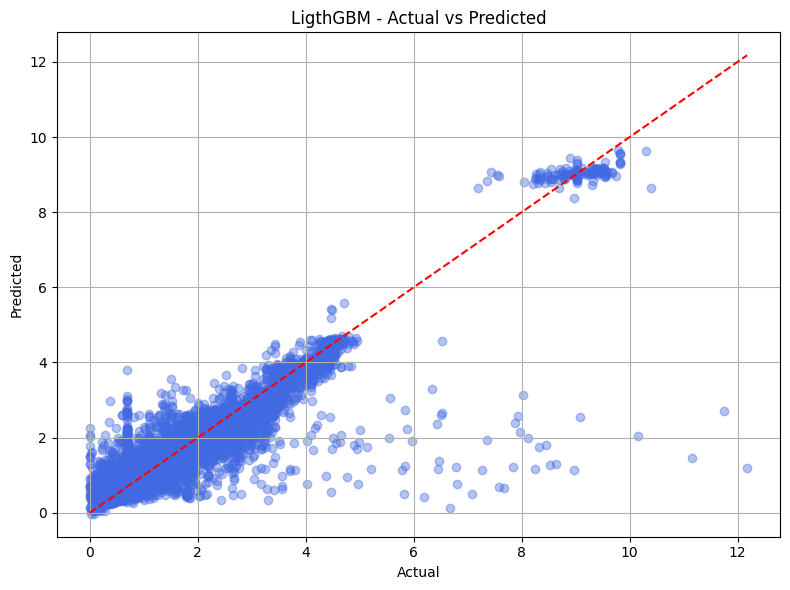

In [74]:
#Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_lgbm_predict, alpha=0.4, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LigthGBM - Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

3. XGBoostRegression model traning 

In [75]:
#  !pip install xgboost (uncommit if not installed)

In [76]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [77]:
reg = XGBRegressor(objective='reg:squarederror', enable_categorical=True, tree_method='hist')

In [78]:
# Grid parameters
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0]
}

In [79]:
model_xgb = GridSearchCV(estimator=reg, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

In [80]:
x_train_scaled

array([[-1.82080311,  0.2165142 ,  0.38424885, ..., -0.59904739,
        -1.83447609,  1.49961352],
       [-1.82080311, -0.01861308,  0.38424885, ..., -0.59904739,
        -1.17458158,  1.49961352],
       [-1.82080311,  0.63293199,  0.38424885, ..., -0.59904739,
        -1.09694693,  1.49961352],
       ...,
       [ 1.42760475, -1.17954357,  0.58384687, ...,  0.11648183,
        -1.95092806, -0.09431833],
       [ 1.42760475,  1.15871883,  1.10010985, ..., -0.094144  ,
        -1.95092806, -0.89128426],
       [ 1.42760475,  0.28096931,  0.34404975, ...,  1.15961693,
         0.76628464, -1.68825019]])

In [81]:
model_xgb.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [4, 6, 8],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [82]:
y_test_xgb_predict = model_xgb.predict(x_test_scaled)
y_train_xgb_predict = model_xgb.predict(x_train_scaled)

In [83]:
r2_test_xgb = r2_score(y_test,y_test_xgb_predict)
r2_train_xgb = r2_score(y_train,y_train_xgb_predict)
r2_test_xgb, r2_train_xgb

(0.8546695311917796, 0.9296263705440456)

4. Neural network (ANN)

In [85]:
# !pip install tensorflow (uncommit if not installled)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout,Input,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [138]:
x_val_NN = x_test_for_scaling[:1000]
y_val_NN = y_test[:1000]
x_test_final_NN = x_test_for_scaling[1000:]
y_test_final_NN= y_test[1000:]

In [139]:
X_val = scaler.transform(x_val_NN)
X_test = scaler.transform(x_test_final_NN)

In [140]:
len(X_val),len(y_val_NN)

(1000, 1000)

In [141]:
x_train_scaled.shape

(230940, 10)

In [142]:
len(x_train_scaled),len(y_train)

(230940, 230940)

In [143]:
model_nn = Sequential([
    Dense(128, input_dim=10, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1)
    
    ])
model_nn.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae','r2_score'])

C:\Users\91742\Desktop\Indian_Agriculture_\myenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [144]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [145]:
model_nn.fit(
    x_train_scaled, y_train,
    validation_data=(X_val, y_val_NN),
    epochs=100,
    batch_size=512,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 1.4338 - mae: 0.7663 - r2_score: -0.0102 - val_loss: 1.1891 - val_mae: 0.6176 - val_r2_score: 0.3568
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1.0058 - mae: 0.6311 - r2_score: 0.2974 - val_loss: 1.2302 - val_mae: 0.6512 - val_r2_score: 0.3346
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.8639 - mae: 0.6021 - r2_score: 0.3909 - val_loss: 0.9851 - val_mae: 0.5960 - val_r2_score: 0.4671
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.8263 - mae: 0.5889 - r2_score: 0.4262 - val_loss: 0.9049 - val_mae: 0.6192 - val_r2_score: 0.5105
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.7448 - mae: 0.5660 - r2_score: 0.4709 - val_loss: 0.8144 - val_mae: 0.5779 - val_r2_score: 0.5595
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.7454 - mae: 0.5684 - r2_score: 0.4800 - val_loss: 0.8259 - val_mae: 0.5940 - val_r2_score: 0.5533
Epoch 7/100
452/452 ━━━━━━

In [146]:
y_test_nn_predict = model_nn.predict(x_test_final_NN)
y_train_nn_predict = model_nn.predict(x_train_scaled)

549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
7217/7217 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


In [147]:
r2_test_nn = r2_score(y_test_final_NN,y_test_nn_predict)
r2_train_nn = r2_score(y_train,y_train_nn_predict)
r2_test_nn, r2_train_nn

(-5289.126290852117, 0.6968502795199394)

LSTM NN

In [148]:
x_train_scaled_lstm = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
X_val_lstm = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [150]:
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(128, return_sequences=False)(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)

    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse', metrics=['mae'])
    return model
input_shape = (x_train_scaled_lstm.shape[1], x_train_scaled_lstm.shape[2])

model_lstm = build_lstm_model(input_shape)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
]


#  Train the Model
history = model_lstm.fit(
    x_train_scaled_lstm, y_train,
    validation_data=(X_val_lstm, y_val_NN),
    epochs=100,
    batch_size=1024,
    callbacks=callbacks,
    verbose=1
)



Epoch 1/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 2.6003 - mae: 1.1360
Epoch 1: val_loss improved from inf to 1.78547, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - loss: 2.5940 - mae: 1.1342 - val_loss: 1.7855 - val_mae: 0.7406 - learning_rate: 0.0010
Epoch 2/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.2664 - mae: 0.7394
Epoch 2: val_loss improved from 1.78547 to 1.65641, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 1.2661 - mae: 0.7393 - val_loss: 1.6564 - val_mae: 0.6866 - learning_rate: 0.0010
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.1537 - mae: 0.6916
Epoch 3: val_loss improved from 1.65641 to 1.43095, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 1.1537 - mae: 0.6916 - val_loss: 1.4310 - val_mae: 0.6429 - learning_rate: 0.0010
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.0939 - mae: 0.6714
Epoch 4: val_loss improved from 1.43095 to 1.36939, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 1.0938 - mae: 0.6714 - val_loss: 1.3694 - val_mae: 0.6323 - learning_rate: 0.0010
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0534 - mae: 0.6541
Epoch 5: val_loss improved from 1.36939 to 1.32192, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 1.0534 - mae: 0.6541 - val_loss: 1.3219 - val_mae: 0.6544 - learning_rate: 0.0010
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.0189 - mae: 0.6426
Epoch 6: val_loss improved from 1.32192 to 1.26407, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 1.0189 - mae: 0.6426 - val_loss: 1.2641 - val_mae: 0.6132 - learning_rate: 0.0010
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0047 - mae: 0.6363
Epoch 7: val_loss improved from 1.26407 to 1.17610, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 1.0046 - mae: 0.6362 - val_loss: 1.1761 - val_mae: 0.6014 - learning_rate: 0.0010
Epoch 8/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.9715 - mae: 0.6273
Epoch 8: val_loss did not improve from 1.17610
226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.9713 - mae: 0.6273 - val_loss: 1.1965 - val_mae: 0.6120 - learning_rate: 0.0010
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.9137 - mae: 0.6152
Epoch 9: val_loss improved from 1.17610 to 1.05597, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.9136 - mae: 0.6152 - val_loss: 1.0560 - val_mae: 0.5975 - learning_rate: 0.0010
Epoch 10/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.8573 - mae: 0.6025
Epoch 10: val_loss improved from 1.05597 to 0.91437, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.8572 - mae: 0.6025 - val_loss: 0.9144 - val_mae: 0.5862 - learning_rate: 0.0010
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8136 - mae: 0.5903
Epoch 11: val_loss did not improve from 0.91437
226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.8136 - mae: 0.5903 - val_loss: 1.0324 - val_mae: 0.6000 - learning_rate: 0.0010
Epoch 12/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8144 - mae: 0.5904
Epoch 12: val_loss did not improve from 0.91437
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.8142 - mae: 0.5903 - val_loss: 0.9665 - val_mae: 0.5891 - learning_rate: 0.0010
Epoch 13/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.7879 - mae: 0.5811
Epoch 13: val_loss improved from 0.91437 to 0.86556, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.7878 - mae: 0.5811 - val_loss: 0.8656 - val_mae: 0.5825 - learning_rate: 0.0010
Epoch 14/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7599 - mae: 0.5749
Epoch 14: val_loss improved from 0.86556 to 0.82899, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.7599 - mae: 0.5749 - val_loss: 0.8290 - val_mae: 0.5743 - learning_rate: 0.0010
Epoch 15/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7434 - mae: 0.5687
Epoch 15: val_loss did not improve from 0.82899
226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.7434 - mae: 0.5687 - val_loss: 0.8832 - val_mae: 0.5797 - learning_rate: 0.0010
Epoch 16/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.7181 - mae: 0.5596
Epoch 16: val_loss improved from 0.82899 to 0.80284, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.7181 - mae: 0.5596 - val_loss: 0.8028 - val_mae: 0.5740 - learning_rate: 0.0010
Epoch 17/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.7195 - mae: 0.5584
Epoch 17: val_loss improved from 0.80284 to 0.76971, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.7194 - mae: 0.5584 - val_loss: 0.7697 - val_mae: 0.5629 - learning_rate: 0.0010
Epoch 18/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6942 - mae: 0.5494
Epoch 18: val_loss improved from 0.76971 to 0.76180, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.6943 - mae: 0.5494 - val_loss: 0.7618 - val_mae: 0.5560 - learning_rate: 0.0010
Epoch 19/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6855 - mae: 0.5437
Epoch 19: val_loss improved from 0.76180 to 0.74810, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.6854 - mae: 0.5436 - val_loss: 0.7481 - val_mae: 0.5475 - learning_rate: 0.0010
Epoch 20/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6773 - mae: 0.5369
Epoch 20: val_loss did not improve from 0.74810
226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.6772 - mae: 0.5369 - val_loss: 0.7488 - val_mae: 0.5482 - learning_rate: 0.0010
Epoch 21/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.6490 - mae: 0.5291
Epoch 21: val_loss did not improve from 0.74810
226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.6491 - mae: 0.5291 - val_loss: 0.7594 - val_mae: 0.5555 - learning_rate: 0.0010
Epoch 22/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6455 - mae: 0.5272
Epoch 22: val_loss did not improve from 0.74810
226/226 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - loss: 0.6454 - mae: 0.5272 - val_loss: 0.7582 - val_mae: 0.5493 - learning_rate: 0.0010
Epoch 23/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6321 - m

226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.6008 - mae: 0.5058 - val_loss: 0.7307 - val_mae: 0.5363 - learning_rate: 5.0000e-04
Epoch 28/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.5906 - mae: 0.5030
Epoch 28: val_loss did not improve from 0.73068
226/226 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.5906 - mae: 0.5030 - val_loss: 0.7384 - val_mae: 0.5360 - learning_rate: 5.0000e-04
Epoch 29/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5854 - mae: 0.5012
Epoch 29: val_loss did not improve from 0.73068
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.5854 - mae: 0.5012 - val_loss: 0.7312 - val_mae: 0.5407 - learning_rate: 5.0000e-04
Epoch 30/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.5866 - mae: 0.5014
Epoch 30: val_loss improved from 0.73068 to 0.71361, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.5866 - mae: 0.5014 - val_loss: 0.7136 - val_mae: 0.5319 - learning_rate: 5.0000e-04
Epoch 31/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5849 - mae: 0.5002
Epoch 31: val_loss did not improve from 0.71361
226/226 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - loss: 0.5849 - mae: 0.5002 - val_loss: 0.7430 - val_mae: 0.5396 - learning_rate: 5.0000e-04
Epoch 32/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5810 - mae: 0.4980
Epoch 32: val_loss did not improve from 0.71361
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.5810 - mae: 0.4980 - val_loss: 0.7139 - val_mae: 0.5304 - learning_rate: 5.0000e-04
Epoch 33/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5852 - mae: 0.4984
Epoch 33: val_loss did not improve from 0.71361
226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.5852 - mae: 0.4984 - val_loss: 0.7554 - val_mae: 0.5420 - learning_rate: 5.0000e-04
Epoch 34/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - 

226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.5547 - mae: 0.4893 - val_loss: 0.7016 - val_mae: 0.5293 - learning_rate: 2.5000e-04
Epoch 37/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5576 - mae: 0.4899
Epoch 37: val_loss did not improve from 0.70163
226/226 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.5576 - mae: 0.4899 - val_loss: 0.7061 - val_mae: 0.5236 - learning_rate: 2.5000e-04
Epoch 38/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5574 - mae: 0.4899
Epoch 38: val_loss did not improve from 0.70163
226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.5574 - mae: 0.4899 - val_loss: 0.7085 - val_mae: 0.5263 - learning_rate: 2.5000e-04
Epoch 39/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5591 - mae: 0.4888
Epoch 39: val_loss did not improve from 0.70163
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.5591 - mae: 0.4888 - val_loss: 0.7055 - val_mae: 0.5285 - learning_rate: 2.5000e-04
Epoch 40/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - l

226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.5447 - mae: 0.4837 - val_loss: 0.6993 - val_mae: 0.5235 - learning_rate: 1.2500e-04
Epoch 47/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5525 - mae: 0.4860
Epoch 47: val_loss did not improve from 0.69930
226/226 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.5524 - mae: 0.4860 - val_loss: 0.7024 - val_mae: 0.5252 - learning_rate: 1.2500e-04
Epoch 48/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5459 - mae: 0.4840
Epoch 48: val_loss did not improve from 0.69930
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.5459 - mae: 0.4840 - val_loss: 0.7009 - val_mae: 0.5256 - learning_rate: 1.2500e-04
Epoch 49/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5371 - mae: 0.4831
Epoch 49: val_loss improved from 0.69930 to 0.69842, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.5372 - mae: 0.4831 - val_loss: 0.6984 - val_mae: 0.5265 - learning_rate: 1.2500e-04
Epoch 50/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5364 - mae: 0.4812
Epoch 50: val_loss did not improve from 0.69842
226/226 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.5363 - mae: 0.4812 - val_loss: 0.7014 - val_mae: 0.5250 - learning_rate: 1.2500e-04
Epoch 51/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.5351 - mae: 0.4825
Epoch 51: val_loss did not improve from 0.69842
226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.5352 - mae: 0.4825 - val_loss: 0.6994 - val_mae: 0.5271 - learning_rate: 1.2500e-04
Epoch 52/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5475 - mae: 0.4842
Epoch 52: val_loss improved from 0.69842 to 0.69464, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.5475 - mae: 0.4841 - val_loss: 0.6946 - val_mae: 0.5225 - learning_rate: 1.2500e-04
Epoch 53/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5382 - mae: 0.4820
Epoch 53: val_loss did not improve from 0.69464
226/226 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.5382 - mae: 0.4820 - val_loss: 0.7011 - val_mae: 0.5279 - learning_rate: 1.2500e-04
Epoch 54/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5483 - mae: 0.4824
Epoch 54: val_loss improved from 0.69464 to 0.69065, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.5483 - mae: 0.4824 - val_loss: 0.6907 - val_mae: 0.5220 - learning_rate: 1.2500e-04
Epoch 55/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.5403 - mae: 0.4818
Epoch 55: val_loss did not improve from 0.69065
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - loss: 0.5402 - mae: 0.4818 - val_loss: 0.6996 - val_mae: 0.5254 - learning_rate: 1.2500e-04
Epoch 56/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5437 - mae: 0.4819
Epoch 56: val_loss did not improve from 0.69065
226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.5437 - mae: 0.4819 - val_loss: 0.6930 - val_mae: 0.5219 - learning_rate: 1.2500e-04
Epoch 57/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5365 - mae: 0.4803
Epoch 57: val_loss did not improve from 0.69065
226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.5365 - mae: 0.4803 - val_loss: 0.6949 - val_mae: 0.5224 - learning_rate: 1.2500e-04
Epoch 58/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step -

226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.5324 - mae: 0.4798 - val_loss: 0.6880 - val_mae: 0.5227 - learning_rate: 6.2500e-05
Epoch 62/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5363 - mae: 0.4793
Epoch 62: val_loss did not improve from 0.68800
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.5363 - mae: 0.4793 - val_loss: 0.6898 - val_mae: 0.5231 - learning_rate: 6.2500e-05
Epoch 63/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.5346 - mae: 0.4782
Epoch 63: val_loss improved from 0.68800 to 0.68731, saving model to best_model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - loss: 0.5346 - mae: 0.4782 - val_loss: 0.6873 - val_mae: 0.5207 - learning_rate: 6.2500e-05
Epoch 64/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.5330 - mae: 0.4795
Epoch 64: val_loss did not improve from 0.68731
226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.5330 - mae: 0.4795 - val_loss: 0.6879 - val_mae: 0.5207 - learning_rate: 6.2500e-05
Epoch 65/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5273 - mae: 0.4777
Epoch 65: val_loss did not improve from 0.68731
226/226 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.5273 - mae: 0.4777 - val_loss: 0.6899 - val_mae: 0.5208 - learning_rate: 6.2500e-05
Epoch 66/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5202 - mae: 0.4755
Epoch 66: val_loss did not improve from 0.68731
226/226 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.5203 - mae: 0.4755 - val_loss: 0.6878 - val_mae: 0.5211 - learning_rate: 6.2500e-05
Epoch 67/100
224/226 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - l

In [153]:
y_pred_lstm = model_lstm.predict(X_test_lstm)

549/549 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [155]:
print("MAE:", mean_absolute_error(y_test_final_NN, y_pred_lstm))
print("RMSE:", mean_squared_error(y_test_final_NN, y_pred_lstm))
print("R² Score:", r2_score(y_test_final_NN, y_pred_lstm))

MAE: 0.45217765595870163
RMSE: 0.48068815706873436
R² Score: 0.6550587327871364


6. Randomforest

In [156]:
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor()
model_RFR.fit(x_train_for_scaling,y_train)
y_test_RFR_predict = model_RFR.predict(x_test_for_scaling)
y_train_RFR_predict = model_RFR.predict(x_train_for_scaling)
r2_score(y_test,y_test_RFR_predict) , r2_score(y_train, y_train_RFR_predict)


(0.8597016722662928, 0.9899566155403495)

In [67]:
r2_score(y_test,y_test_RFR_predict) , r2_score(y_train, y_train_RFR_predict)

(0.8483749253343601, 0.9905486457436928)

Hyperparmeter tunning with catboost

In [34]:
! pip install catboost optuna --quiet

In [243]:
import optuna

In [257]:
def objective(trial):
    # Define hyperparameters to search
    bootstrap_type = trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli"])
    params = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'depth': trial.suggest_int('depth', 4, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 3, 30, log=True),
        
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10, log=True),
        'border_count': trial.suggest_int('border_count', 64, 254),
        'bootstrap_type': bootstrap_type,
        

        
        # Fixed GPU params
        'task_type': 'GPU',
        'devices': '0',
        'eval_metric': 'R2',
        'loss_function': 'RMSE',
        'early_stopping_rounds': 50,
        'verbose': 0
    }
    if bootstrap_type == "Bayesian":
        params["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 1)
    else:  # Bernoulli
        params["subsample"] = trial.suggest_float("subsample", 0.5, 0.9)


    model = CatBoostRegressor(**params)
    model.fit(train_pool, eval_set=test_val_pool)
    preds = model.predict(x_test)
    r2 = r2_score(y_test, preds)
    
    return r2  # maximize R² score

In [258]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, timeout=1800)

[I 2025-06-09 10:59:18,602] A new study created in memory with name: no-name-004503a9-6f6a-4270-b007-2b80e7e08e68
Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
[I 2025-06-09 10:59:38,007] Trial 0 finished with value: 0.8485922922798046 and parameters: {'bootstrap_type': 'Bayesian', 'iterations': 1981, 'depth': 5, 'learning_rate': 0.05889763579078449, 'l2_leaf_reg': 3.561127497292958, 'random_strength': 1.0622339623277016e-05, 'border_count': 238, 'bagging_temperature': 0.7916497411810295}. Best is trial 0 with value: 0.8485922922798046.
Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
[I 2025-06-09 10:59:45,322] Trial 1 finished with value: 0.8039930699846304 and parameters: {'bootstrap_type': 'Bayesian', 'i

In [259]:
print("Best Trial Score:", study.best_value)
print("Best Parameters:", study.best_params)


Best Trial Score: 0.8649831773239316
Best Parameters: {'bootstrap_type': 'Bernoulli', 'iterations': 1635, 'depth': 8, 'learning_rate': 0.06923089035985155, 'l2_leaf_reg': 8.463357288287257, 'random_strength': 0.10278707954860868, 'border_count': 169, 'subsample': 0.8925529540770604}


In [260]:
best_model = CatBoostRegressor(**study.best_params,
                                task_type='GPU',
                                devices='0',
                                eval_metric='R2',
                                loss_function='RMSE',
                                early_stopping_rounds=50,
                                verbose=100)



best_model.fit(train_pool, eval_set=test_val_pool)

# Final prediction & evaluation
y_pred = best_model.predict(test_pool)


print("Final R2:", r2_score(y_test_final, y_pred))
print("MAE:", mean_absolute_error(y_test_final, y_pred))
print("RMSE:", mean_squared_error(y_test_final, y_pred))

Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	learn: 0.0835502	test: 0.0716786	best: 0.0716786 (0)	total: 28ms	remaining: 45.7s
100:	learn: 0.8410851	test: 0.8057755	best: 0.8057755 (100)	total: 2.32s	remaining: 35.2s
200:	learn: 0.8730007	test: 0.8367243	best: 0.8369175 (199)	total: 4.63s	remaining: 33s
300:	learn: 0.8892993	test: 0.8538337	best: 0.8538337 (300)	total: 6.94s	remaining: 30.8s
400:	learn: 0.8976768	test: 0.8627277	best: 0.8627339 (398)	total: 9.32s	remaining: 28.7s
500:	learn: 0.9044608	test: 0.8671399	best: 0.8671399 (500)	total: 11.7s	remaining: 26.5s
600:	learn: 0.9094954	test: 0.8689648	best: 0.8690938 (598)	total: 14.1s	remaining: 24.3s
700:	learn: 0.9136845	test: 0.8741445	best: 0.8742203 (697)	total: 16.5s	remaining: 22s
800:	learn: 0.9169369	test: 0.8760232	best: 0.8761102 (795)	total: 18.9s	remaining: 19.6s
900:	learn: 0.9198884	test: 0.8791694	best: 0.8792904 (898)	total: 21.3s	remaining: 17.4s
bestTest = 0.8797769237
bestIteration = 914
Shrink model to first 915 iterations.
Final R2: 0.863825453574541

In [261]:
y_pred_train = best_model.predict(x_train)
r2_score(y_train,y_pred_train)

0.921483620884095

In [263]:
r2_score(y_test_final,y_pred)

0.8638254535745415

In [264]:
model.save_model("catboost_best_model.cbm")

In [265]:
from catboost import CatBoostRegressor, Pool

In [266]:
model=CatBoostRegressor()

In [267]:
model.load_model('catboost_best_model.cbm')

In [268]:
x_test

,crop_year,season,crop,area,temperature_2m_mean,precipitation_sum,relative_humidity_2m_mean,wind_speed_10m_mean,latitude,longitude
233190,2019,rabi,onion,6.526495,21.215668,0.823214,61.295507,9.224021,26.276809,86.795961
249168,2019,rabi,wheat,7.289611,23.875864,1.349309,65.630184,7.938191,22.420000,87.320000
249169,2019,rabi,wheat,10.872560,22.873675,1.235138,61.213134,7.837558,24.174599,88.272133
249170,2019,rabi,wheat,8.730529,22.787903,1.685599,66.779378,7.476382,23.484737,88.556707
249171,2019,rabi,wheat,7.513709,22.922062,1.677477,65.107143,7.409447,23.388409,87.960676
...,...,...,...,...,...,...,...,...,...,...
249491,2020,rabi,wheat,9.114160,12.551224,2.734038,60.397664,3.186096,30.729860,78.443420
249460,2020,wholeyear,turmeric,0.693147,12.463553,6.557644,56.127426,3.479982,30.608720,79.065170
249485,2020,rabi,wheat,9.965476,7.998832,2.927197,71.856507,5.530812,29.390529,79.460869
249431,2020,kharif,soyabean,3.610918,19.961075,13.932401,85.659140,3.244839,30.008790,79.928018


In [269]:
input_data = pd.DataFrame([{
                    "crop_year": 2021,
                    "season": 'Kharif',
                    "crop": 'bajra',
                    "area": np.log1p(50000),
                    "temperature_2m_mean": 25,
                    "precipitation_sum": 66,
                    "relative_humidity_2m_mean": 30,
                    "wind_speed_10m_mean": 10,
                    "latitude": 14,
                    "longitude": 78,
                }])

In [270]:
model.predict(input_data)

array([1.04679436])